**Extension: Predicting the price of King County Houses using Linear Regression Model.**



---



# **Reading Data** 

In [377]:
#import libraries
import pandas as pd
import numpy as np
from statsmodels.api import OLS
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

In [378]:
#reading file - train data and test data separately
house_train=pd.read_csv("https://raw.githubusercontent.com/aanchalkhanna72/Datasets/main/kc_house_train_data.csv")
house_test=pd.read_csv("https://raw.githubusercontent.com/aanchalkhanna72/Datasets/main/kc_house_test_data.csv")
#house=pd.concat([house_train,house_test],axis=0)

In [379]:
#reading column names and their data types
house_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [380]:
#checking  for null values
house_test.isnull().sum(),house_train.isnull().sum()

(id               0
 date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 grade            0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 zipcode          0
 lat              0
 long             0
 sqft_living15    0
 sqft_lot15       0
 dtype: int64, id               0
 date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 grade            0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 zipcode          0
 lat              0
 long             0
 sqft_living15    0
 sqft_lot15       0
 dtype: int64)

In [381]:
#drop redundant columns
house_train=house_train.drop(columns=["id","lat","long"],axis=1)
house_test=house_test.drop(columns=["id","lat","long"],axis=1)

**Changing Datatypes**

In [382]:
#checking datatypes of features
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9761 non-null   object 
 1   price          9761 non-null   float64
 2   bedrooms       9761 non-null   int64  
 3   bathrooms      9761 non-null   float64
 4   sqft_living    9761 non-null   int64  
 5   sqft_lot       9761 non-null   int64  
 6   floors         9761 non-null   float64
 7   waterfront     9761 non-null   int64  
 8   view           9761 non-null   int64  
 9   condition      9761 non-null   int64  
 10  grade          9761 non-null   int64  
 11  sqft_above     9761 non-null   int64  
 12  sqft_basement  9761 non-null   int64  
 13  yr_built       9761 non-null   int64  
 14  yr_renovated   9761 non-null   int64  
 15  zipcode        9761 non-null   int64  
 16  sqft_living15  9761 non-null   int64  
 17  sqft_lot15     9761 non-null   int64  
dtypes: float

In [383]:
#changing date from 'object' to 'datetime' format
house_train["date"]=pd.to_datetime(house_train.date)
house_test["date"]=pd.to_datetime(house_test.date)

In [384]:
#converting zipcode from 'int' to 'object'
house_train["zipcode"]=house_train["zipcode"].astype(object)
house_test["zipcode"]=house_test["zipcode"].astype(object)

In [385]:
#converting date object to datetime format 
house_train["Date"]=pd.to_datetime(house_train["date"])
house_test["Date"]=pd.to_datetime(house_test["date"])

In [386]:
house_train.Date

0      2014-12-09
1      2014-05-12
2      2014-05-27
3      2014-05-28
4      2014-10-07
          ...    
9756   2015-01-26
9757   2014-10-14
9758   2015-03-26
9759   2014-06-23
9760   2014-10-15
Name: Date, Length: 9761, dtype: datetime64[ns]

In [387]:
#finding  the year in which the most  recent house was sold (Test)
house_test["Yr_sold"]=pd.DatetimeIndex(house_test["Date"]).year
np.max(house_test.Yr_sold)

2015

**Uni-Variate Analysis:**

Considering the scope of this assignment and that this analysis has already been done in detail in the Housing Project, we will not be writing our observations in detail in this section again. This was just a refresher  for our own observations.

In [388]:
#segregating continuous  variables for visualization
cont_train = house_train.drop(columns=['Date','date','zipcode','yr_renovated','yr_built','waterfront','bedrooms','bathrooms','floors','view','grade','condition'])

In [389]:
#segregating continuous  variables for visualization
cont_test = house_test.drop(columns=['date','zipcode','yr_renovated','yr_built','waterfront','bedrooms','bathrooms','floors','view','grade','condition'])

In [390]:
#checking
cont_train.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

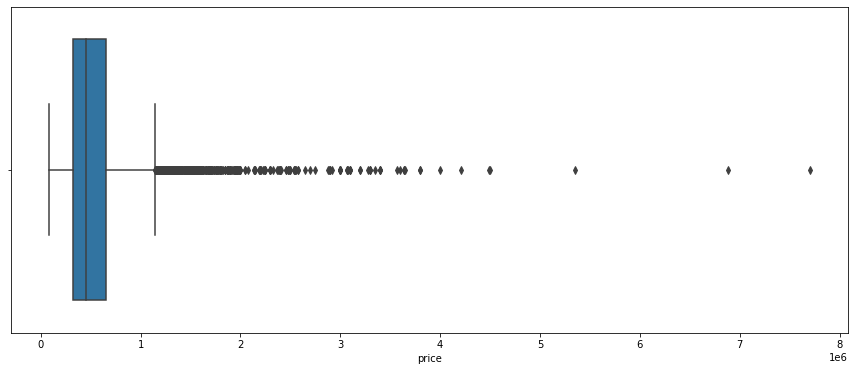

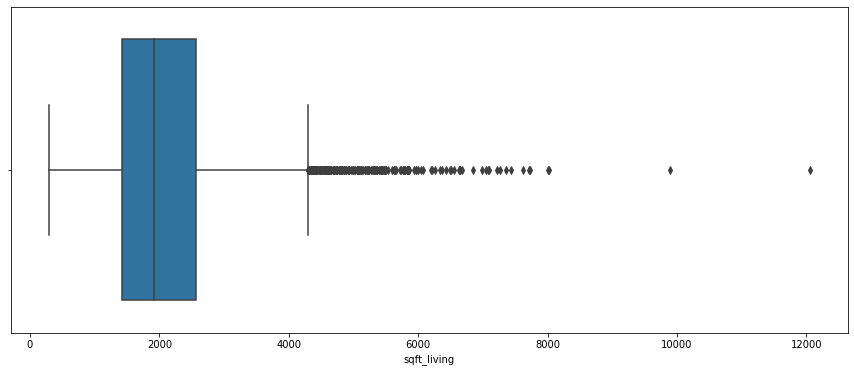

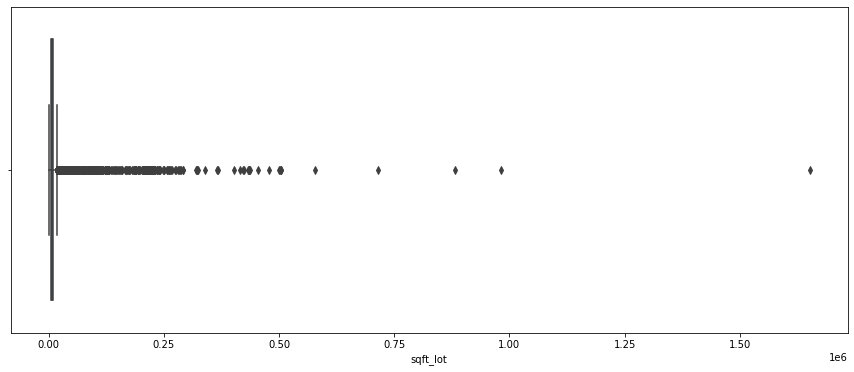

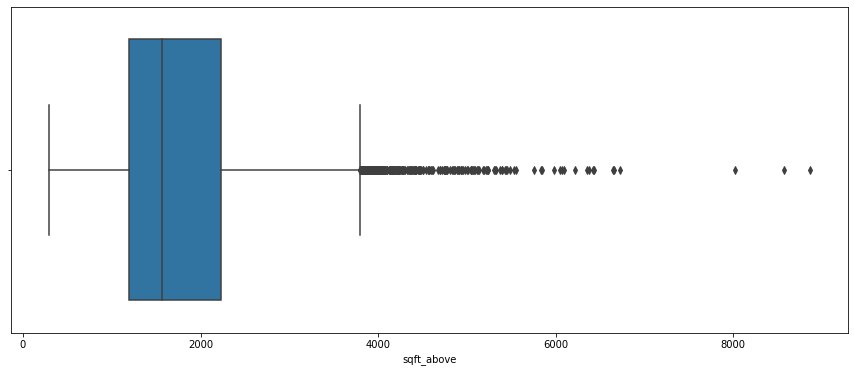

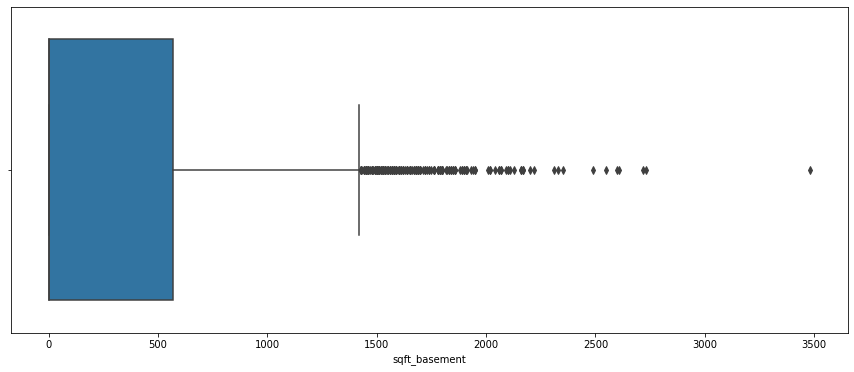

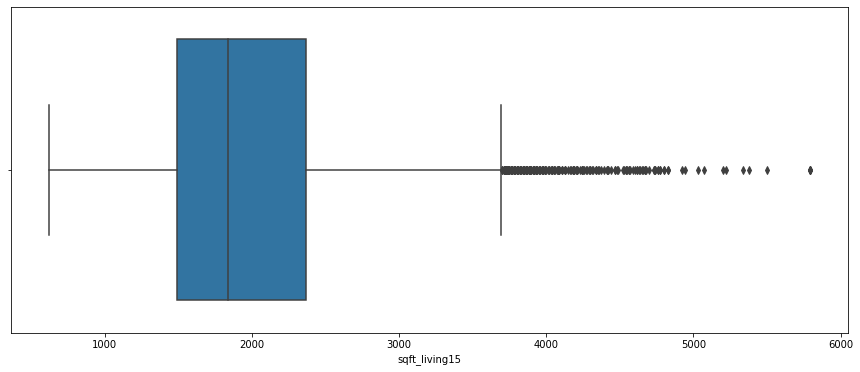

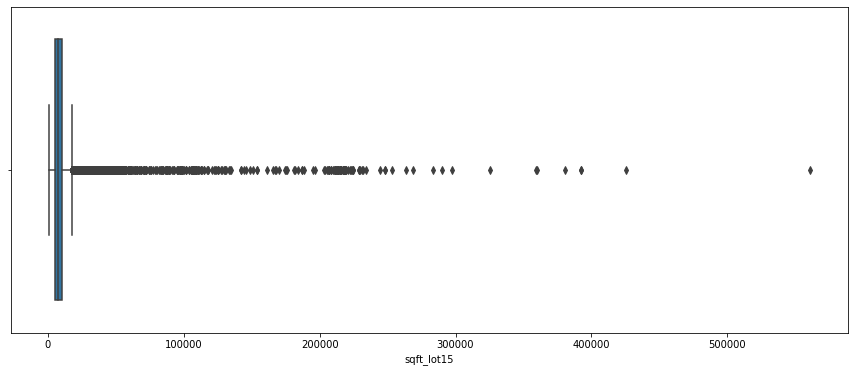

In [391]:
#creating boxplots for continuous variables
for column in cont_train.columns:
  plt.figure(figsize=(15,6))
  sns.boxplot(x = column, data = house_train)
  plt.show()

In [392]:
#segregating categorical/discrete variables
discrete = house_train[['date','zipcode','yr_renovated','yr_built','waterfront','bedrooms','bathrooms','floors','view','grade','condition']]
discrete = discrete.drop('date',axis=1)

In [393]:
discrete.columns

Index(['zipcode', 'yr_renovated', 'yr_built', 'waterfront', 'bedrooms',
       'bathrooms', 'floors', 'view', 'grade', 'condition'],
      dtype='object')

**Key Insights:** 
Since there are outliers in almost all our continuous variables, we will look at how  these outliers appear in  the bivariate analysis. Depending on the results of bivariate analysis, we may cap/remove/impute or leave our outliers as  they are. 


**Bi-Variate Analysis:**

Objective: a) To observe the relationships between predictors and target, b) To obtain clues for feature engineering and feature selection, c)To decide how to deal with our outliers.

> Plotting each predictor with our target variable 'price'

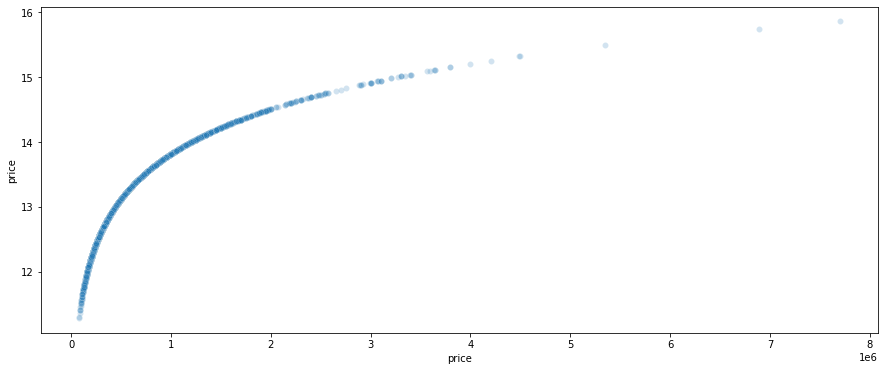

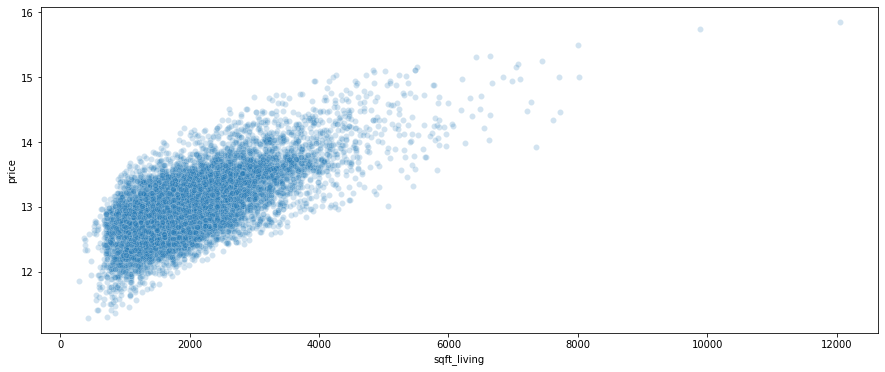

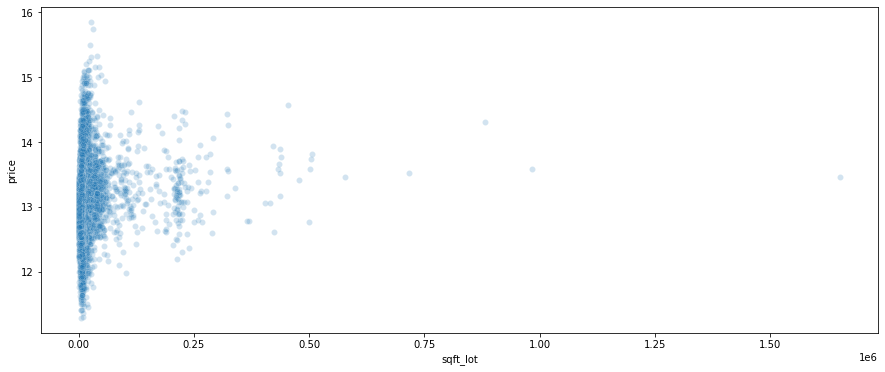

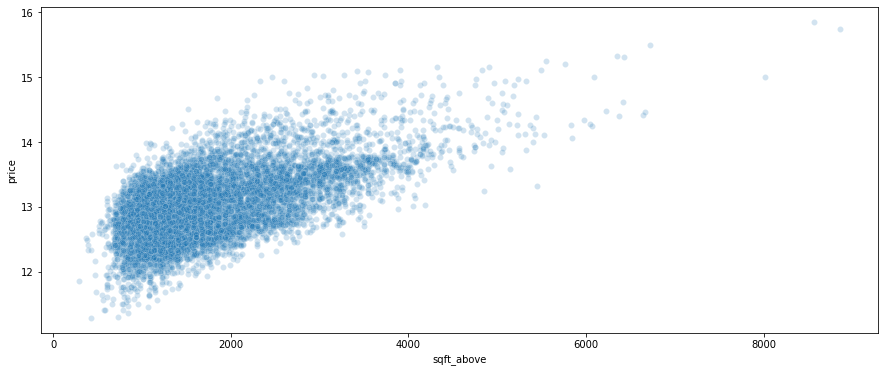

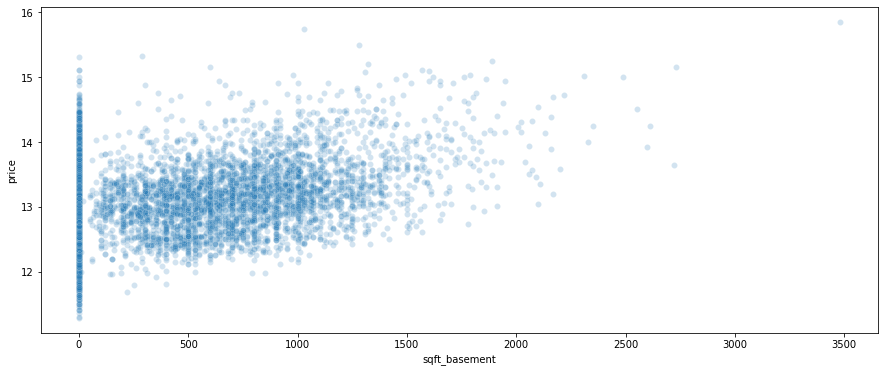

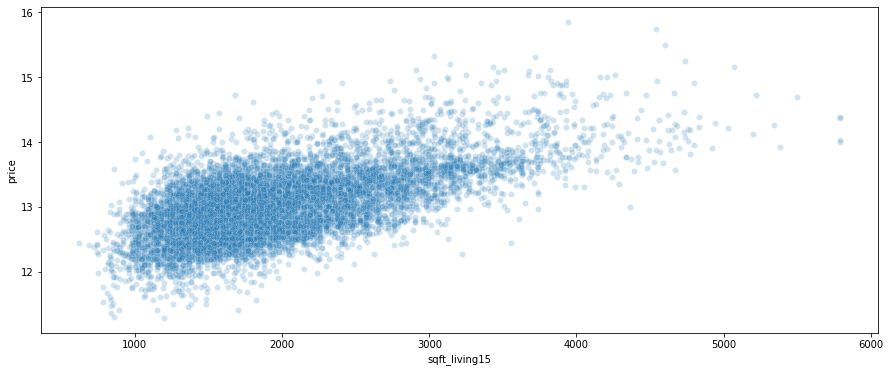

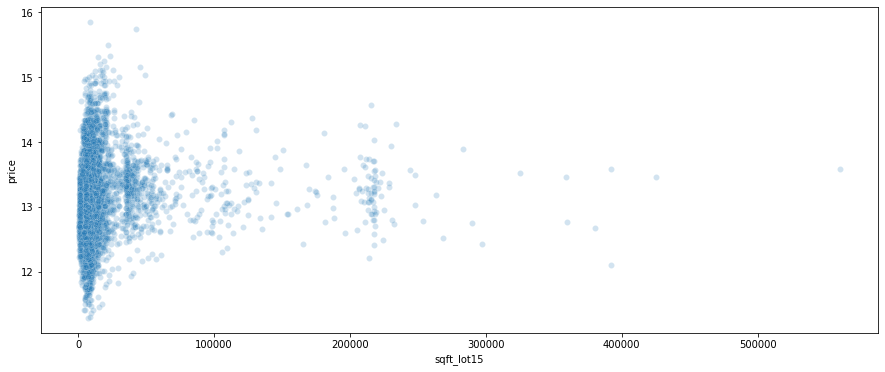

In [394]:
for column in cont_train:
  plt.figure(figsize=(15,6))
  sns.scatterplot(y=np.log(cont_train.price), x = column, data=house_train,alpha=0.20)
  plt.show()

**Key insights:** Most of our plots show a linear relationship (although weak in some places) between variables. If lines are plotted following most datapoints in all graphs, we will see that for the most part, outliers also seem to follow the positive relationship thereby showing that these outliers are simply innfluential observations. We will leave them as they are in our dataset. 

**Feature  Engineering and Tranformation** 

Creating a new feature 'Age_of_the_house' from existing features 'Yr_sold'(created by extracting year fromm 'date') and 'yr_built'

In [395]:
#finding the year that each house for sold in
house_train["Yr_sold"]=pd.DatetimeIndex(house_train["date"]).year
house_test["Yr_sold"]=pd.DatetimeIndex(house_test["date"]).year

In [396]:
#Creating a feature 'Age_of_the_house' by subtracting 'Yr_sold' and 'yr_built'
house_train['Age_of_the_house']=house_train['Yr_sold']-house_train["yr_built"]
house_test['Age_of_the_house']=house_test['Yr_sold']-house_test["yr_built"]

In [397]:
#Creating feature years since renovated variable -train
house_train["years_since_renovated"]=np.where(house_train["yr_renovated"]==0,0,house_train["Yr_sold"]-house_train["yr_renovated"])


In [398]:
#Creating feature years since renovated variable -test
house_test["years_since_renovated"]=np.where(house_test["yr_renovated"]==0,0,house_test["Yr_sold"]-house_test["yr_renovated"])


In [399]:
#Now, dropping the variables that have become redundant or are repetitive
house_train = house_train.drop(columns=['date','Yr_sold','sqft_living15','sqft_lot15','yr_renovated'])

In [400]:
#Now, dropping the variables that have become redundant or are repetitive
house_test = house_test.drop(columns=['date','Yr_sold','sqft_living15','sqft_lot15','yr_renovated'])

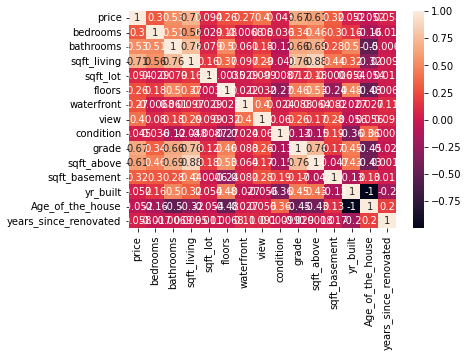

In [401]:
#relationship between variables to see if more can be dropped or changed
sns.heatmap(house_train.corr(),annot=True)

In [402]:
#creating variable plot size by combining sqft_lot+sqft_living
house_train["plot_size"]=house_train["sqft_living"]+house_train["sqft_lot"]
house_test["plot_size"]=house_test["sqft_living"]+house_test["sqft_lot"]

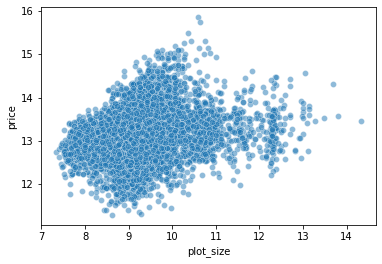

In [403]:
#checking relationship of log plot size with log price because without the log transformations, no relationships were visible where there logically should have been one
sns.scatterplot(y=np.log(house_train.price),x=np.log(house_train.plot_size),alpha=0.5)

In [404]:
#creating variable log plot size by combining sqft_lot+sqft_living
house_train["log_plot_size"]=np.log(house_train["sqft_living"]+house_train["sqft_lot"])
house_test["log_plot_size"]=np.log(house_test["sqft_living"]+house_test["sqft_lot"])

In [405]:
#transforming variables
#one hot encoding of zipcodes - train
dummies_train=pd.get_dummies(house_train["zipcode"])
house_train=house_train.join(dummies_train)

In [406]:
#one hot encoding of zipcodes - test
dummies_test=pd.get_dummies(house_test["zipcode"])
house_test=house_test.join(dummies_test)

In [407]:
#"basement" dummy variable
house_train["basement"]=np.where(house_train["sqft_basement"]>0,1,0)
house_test["basement"]=np.where(house_test["sqft_basement"]>0,1,0)

In [408]:
house_train.columns

Index([                'price',              'bedrooms',
                   'bathrooms',           'sqft_living',
                    'sqft_lot',                'floors',
                  'waterfront',                  'view',
                   'condition',                 'grade',
                  'sqft_above',         'sqft_basement',
                    'yr_built',               'zipcode',
                        'Date',      'Age_of_the_house',
       'years_since_renovated',             'plot_size',
               'log_plot_size',                   98001,
                         98002,                   98003,
                         98004,                   98005,
                         98006,                   98007,
                         98008,                   98010,
                         98011,                   98014,
                         98019,                   98022,
                         98023,                   98024,
                         98027,

In [409]:
#dropping columns that are redundant or provide no information that is usable to the model
house_train=house_train.drop(["Date","sqft_lot","sqft_living","floors","zipcode","yr_built","sqft_basement","sqft_above","plot_size"],axis=1)
house_test=house_test.drop(["Date","sqft_lot","sqft_living","floors","zipcode","yr_built","sqft_basement","sqft_above","plot_size"],axis=1)

In [410]:
#Performing log transformation of our target variable
house_train['log_price'] = np.log(house_train.price)
house_test['log_price'] = np.log(house_test.price)

**Model Building**

In [411]:
#Importing error metrics
from sklearn.metrics import mean_absolute_percentage_error

In [412]:
#Importing Linear Regression
from sklearn.linear_model import LinearRegression

In [413]:
lr = LinearRegression()

In [414]:
#Training data
X_train = house_train.drop(columns=['price','log_price'],axis=1)

In [415]:
y_train = house_train.log_price

In [416]:
#Test data
X_test = house_test.drop(columns=['log_price','price'],axis=1)

In [417]:
y_test = house_test.log_price

In [418]:
#Fitting the linear regression model
lr.fit(X_train,y_train)

LinearRegression()

In [419]:
#Predictions for our train data
y_train_pred = np.exp(lr.predict(X_train))
y_train_pred

array([ 581251.79519064, 1634752.84667715,  487461.9806333 , ...,
        808420.74031558,  321727.33024222,  317435.03869772])

In [420]:
#Calculating R2 score(i.e. goodness of fit) on train  data
lr.score(X_train,y_train)

0.8600133051998622

In [421]:
#Taking antilog of our transformed target variable to mmake it interprettable again
y_train_antilog = np.exp(y_train)

In [422]:
#Calculating MAPE for train data
mean_absolute_percentage_error(y_train_antilog,y_train_pred)

0.15403656074776242

In [423]:
#Predictions for our test data
y_pred = np.exp(lr.predict(X_test))
y_pred

array([297322.99391166, 596473.35988963, 218015.7346459 , ...,
       465841.42963538, 326537.67965449, 479470.21959469])

In [424]:
#Taking antilog of our transformed target variable to mmake it interprettable again
y_test_antilog = np.exp(y_test)

In [425]:
#Calcualting MAPE for our test data
mean_absolute_percentage_error(y_test_antilog,y_pred)

0.15896135835089867

**Checking for Linear Regression Assumptions**

1. Linear Relationship b/w Target and Features (already observed above)

2. Normality of Residuals

In [435]:
residual=y_test_antilog-y_pred
residual

0        25677.006088
1       -66473.359890
2       -29015.734646
3       118655.469465
4        27408.933082
            ...      
2212     66931.236610
2213     43174.156078
2214    142658.570365
2215    -96537.679654
2216    -64970.219595
Name: log_price, Length: 2217, dtype: float64

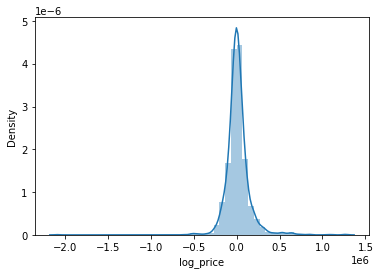

In [427]:
sns.distplot(residual,kde=True)

3. No Multicollinearity

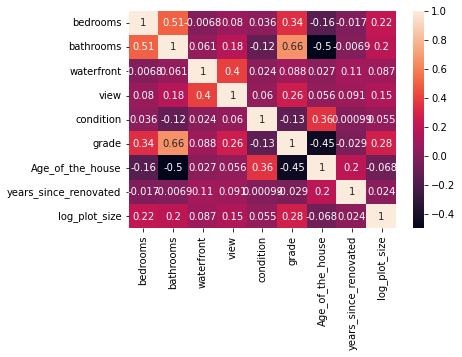

In [441]:
X_train_cols=X_train[['bedrooms','bathrooms','waterfront','view','condition', 'grade','Age_of_the_house','years_since_renovated','log_plot_size']]
sns.heatmap(X_train_cols.corr(),annot=True)

Some of our  variables namely  bedrooms,bathrooms,grade seem to have a medium  correlation with other variables.  We will have to explore ways to reduce this effect (if  any) in our consequent models.

4. No Autocorrelation of Errors

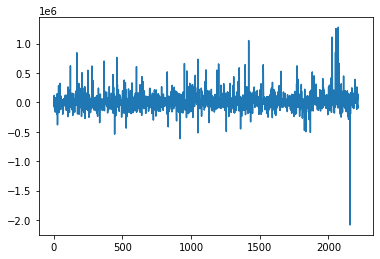

In [439]:
plt.plot(residual)
#displays negative autocorrelation as  there is no relationship between residuals

5. Homoscedasticity

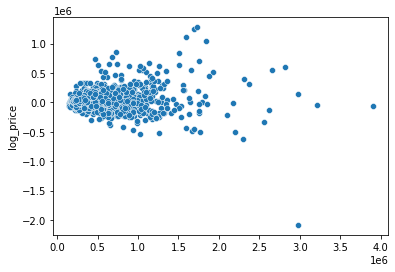

In [438]:
sns.scatterplot(y=residual,x=y_pred)
plt.show()
#shows constant variance

**E22001 Aanchal Khanna | E22011 Arav Sood**